In [2]:
from imageai.Detection import ObjectDetection
import os

execution_path = os.getcwd()

detector = ObjectDetection()
detector.setModelTypeAsRetinaNet()
detector.setModelPath( os.path.join(execution_path , "resnet50_coco_best_v2.0.1.h5"))
detector.loadModel()
custom_objects = detector.CustomObjects(bottle=True)
detections = detector.detectCustomObjectsFromImage(input_image=os.path.join(execution_path , "bottle.jpg"), output_image_path=os.path.join(execution_path , "bottle_detection.png"), custom_objects=custom_objects, minimum_percentage_probability=65)


for eachObject in detections:
   print(eachObject["name"] + " : " + eachObject["percentage_probability"] )
   print("--------------------------------")

bottle : 93.76860857009888
--------------------------------
bottle : 97.5142776966095
--------------------------------
bottle : 97.390216588974
--------------------------------


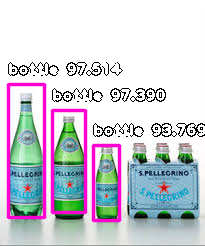

In [3]:
from IPython.display import Image
Image("bottle_detection.png")

In [4]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

camera = cv2.VideoCapture(1)
while True:
    return_value,image = camera.read()
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    cv2.imshow('image',image)
    if cv2.waitKey(1)& 0xFF == ord('s'):
        cv2.imwrite('cam_screenshot.jpg',image)
        detections = detector.detectCustomObjectsFromImage(input_image=os.path.join(execution_path , "cam_screenshot.jpg"), output_image_path=os.path.join(execution_path , "cam_bottle_detection.png"), custom_objects=custom_objects, minimum_percentage_probability=65)
        img_detection=mpimg.imread('cam_bottle_detection.png')
        cv2.imshow('cam_bottle_detection',img_detection)
    if cv2.waitKey(1)& 0xFF == ord('q'):
        break
camera.release()
cv2.destroyAllWindows()

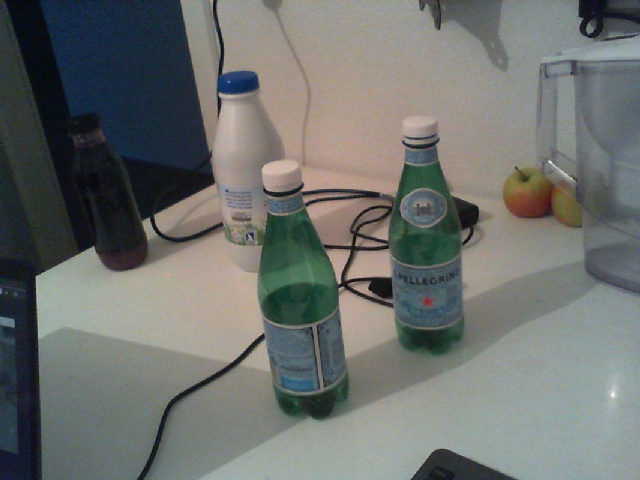

In [7]:
Image("cam_screenshot.jpg")

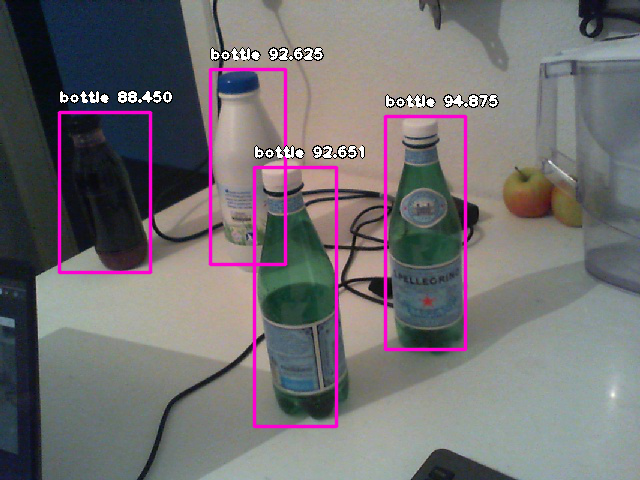

In [5]:
Image("cam_bottle_detection.png")